## 라이브러리 불러오기

In [70]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import koreanize_matplotlib

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
pd.options.display.max_columns = None

## 데이터 불러오기

In [139]:
df = pd.read_csv("complete_orders.csv").iloc[:,1:]
print(df.shape)
df.head()

(94078, 29)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp order_approved_at  \
0    delivered               2017-02-10        2017-02-10   
1    delivered               2017-08-15        2017-08-15   
2    delivered               2017-02-08        2017-02-08   
3    delivered               2017-10-23        2017-10-25   
4    delivered               2018-07-24        2018-07-26   

  order_delivered_carrier_date order_delivered_customer_date  \
0                   2017-04-10                    2017-10-10   
1                   2017-08-17                    2017-08-18   
2                   2017-04-08                    2017-07-08   
3                   2017-10-27                    2017-11-07   
4                   2018-07-26                    2018-08-07   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-08-28  3a51803cc0d012c3b5dc8b7528cb05f7   
2                    2017-08-15  ef0996a1a279c26e7ecbd737be23d235   
3                    2017-11-13  e781fdcc107d13d865fc7698711cc572   
4                    2018-08-13  af07308b275d755c9edb36a90c618231   

   zip_code_prefix_customer  customer_city customer_state  \
0                      3149      sao paulo             SP   
1                      3366      sao paulo             SP   
2                      2290      sao paulo             SP   
3                     88032  florianopolis             SC   
4                     47813      barreiras             BA   

   geolocation_lat_customer  geolocation_lng_customer  \
0                -23.583452                -46.586284   
1                -23.564977                -46.536043   
2                -23.532175                -46.626106   
3                -27.553442                -48.500027   
4                -12.124719                -45.011148   

                          seller_id  zip_code_prefix_seller     seller_city  \
0  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
1  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
2  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
3  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
4  289cdb325fb7e7f891c38608bf9e0962                   31570  belo horizonte   

  seller_state  geolocation_lat_seller  geolocation_lng_seller  order_item_id  \
0           SP              -23.675542              -46.442547              1   
1           SP              -23.675542              -46.442547              1   
2           SP              -23.675542              -46.442547              1   
3           SP              -23.675542              -46.442547              1   
4           SP              -19.813375              -43.984022              1   

                         product_id shipping_limit_date   price  \
0  87285b34884572647811a353c7ac498a          2017-10-06   29.99   
1  87285b34884572647811a353c7ac498a          2017-08-21   29.99   
2  87285b34884572647811a353c7ac498a          2017-08-08   29.99   
3  87285b34884572647811a353c7ac498a          2017-10-31   29.99   
4  595fac2a385ac33a80bd5114aec74eb8          2018-07-30  118.70   

   freight_value  review_score payment_type  payment_installments  \
0           8.72             4      voucher                     1   
1           7.78             4  credit_card                     3   
2           7.78             5  credit_card                     1   
3          14.10             3       boleto                     1   
4

In [140]:
from glob import glob
glob('data/*')

['data/order_reviews.csv',
 'data/customers.csv',
 'data/products.csv',
 'data/orders.csv',
 'data/product_category_name_translation.csv',
 'data/geolocation.csv',
 'data/payments.csv',
 'data/sellers.csv',
 'data/order_items.csv']

In [141]:
df[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", \
    "order_delivered_customer_date", "order_estimated_delivery_date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94078 entries, 0 to 94077
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_purchase_timestamp       94078 non-null  object
 1   order_approved_at              94078 non-null  object
 2   order_delivered_carrier_date   94078 non-null  object
 3   order_delivered_customer_date  94078 non-null  object
 4   order_estimated_delivery_date  94078 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


In [142]:
for i in ['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']:
    df[i] = pd.to_datetime(df[i])

## 배송 관련 변수
* `order_purchase` : 구매 시각
* `order_approved` : 결제 승인 시각
* `order_delivered_carrier` : 물류 파트너에게 처리 시각
* `order_delivered_customer` : 실제 주문 배송 날짜
* `order_estimated_delivery` : 예상 배송일

In [143]:
df[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",\
    "order_delivered_customer_date", "order_estimated_delivery_date"]]

order_purchase_timestamp order_approved_at order_delivered_carrier_date  \
0                   2017-02-10        2017-02-10                   2017-04-10   
1                   2017-08-15        2017-08-15                   2017-08-17   
2                   2017-02-08        2017-02-08                   2017-04-08   
3                   2017-10-23        2017-10-25                   2017-10-27   
4                   2018-07-24        2018-07-26                   2018-07-26   
...                        ...               ...                          ...   
94073               2018-02-03        2018-02-03                   2018-03-06   
94074               2017-08-10        2017-08-10                   2017-08-18   
94075               2017-12-20        2017-12-20                   2017-12-20   
94076               2017-03-09        2017-03-09                   2017-03-10   
94077               2018-03-08        2018-03-09                   2018-03-09   

      order_delivered_customer_date order_estimated_delivery_date  
0                        2017-10-10                    2017-10-18  
1                        2017-08-18                    2017-08-28  
2                        2017-07-08                    2017-08-15  
3                        2017-11-07                    2017-11-13  
4                        2018-08-07                    2018-08-13  
...                             ...                           ...  
94073                    2018-03-16                    2018-03-21  
94074                    2017-08-23                    2017-08-31  
94075                    2018-01-26                    2018-01-18  
94076                    2017-03-17                    2017-03-28  
94077                    2018-03-16                    2018-03-04  

[94078 rows x 5 columns]

In [144]:
df.loc[df.order_delivered_customer_date < df.order_approved_at]\
[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",\
    "order_delivered_customer_date", "order_estimated_delivery_date"]]

Empty DataFrame
Columns: [order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []

### 고객 구매 - 결제 승인 - 물류 파트너 처리 - 실제 주문 배송

In [34]:
# 고객 구매 날짜 - 결제 승인 날짜
purchase_approved = df["order_approved_at"] - df["order_purchase_timestamp"]
purchase_approved.describe()

count                         94078
mean      3 days 05:40:12.066583048
std      12 days 14:21:40.065639658
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 1 days 00:00:00
max               259 days 00:00:00
dtype: object

In [38]:
# 결제 승인 날짜 - 물류 파트너에게 처리 날짜
approved_carrier = df["order_delivered_carrier_date"] - df["order_approved_at"]
approved_carrier.describe()

count                         94078
mean     13 days 01:27:43.275154659
std      30 days 02:32:24.964035893
min                 0 days 00:00:00
25%                 1 days 00:00:00
50%                 2 days 00:00:00
75%                 6 days 00:00:00
max               385 days 00:00:00
dtype: object

In [32]:
# 물류 파트너에게 처리 날짜 - 실제 주문 배송 날짜
carrier_delivered = df["order_delivered_customer_date"] - df["order_delivered_carrier_date"]
carrier_delivered.describe()

count                         94078
mean     35 days 22:03:02.605922745
std      59 days 05:25:37.354552778
min                 0 days 00:00:00
25%                 5 days 00:00:00
50%                 9 days 00:00:00
75%                31 days 00:00:00
max               568 days 00:00:00
dtype: object

In [52]:
all_process_time = pd.concat([purchase_approved, approved_carrier, carrier_delivered], axis=1)
all_process_time.columns = ["purchase_approved", "approved_carrier", "carrier_delivered"]
all_process_time = all_process_time[all_process_time.notnull()]
all_process_time.head()

purchase_approved approved_carrier carrier_delivered
0            0 days          59 days          183 days
1            0 days           2 days            1 days
2            0 days          59 days           91 days
3            2 days           2 days           11 days
4            2 days           0 days           12 days

In [64]:
all_process_time.describe()

purchase_approved            approved_carrier  \
count                       94078                       94078   
mean    3 days 05:40:12.066583048  13 days 01:27:43.275154659   
std    12 days 14:21:40.065639658  30 days 02:32:24.964035893   
min               0 days 00:00:00             0 days 00:00:00   
25%               0 days 00:00:00             1 days 00:00:00   
50%               0 days 00:00:00             2 days 00:00:00   
75%               1 days 00:00:00             6 days 00:00:00   
max             259 days 00:00:00           385 days 00:00:00   

                carrier_delivered  
count                       94078  
mean   35 days 22:03:02.605922745  
std    59 days 05:25:37.354552778  
min               0 days 00:00:00  
25%               5 days 00:00:00  
50%               9 days 00:00:00  
75%              31 days 00:00:00  
max             568 days 00:00:00

In [66]:
for i in all_process_time:
    all_process_time[i] = all_process_time[i].dt.days

all_process_time

purchase_approved  approved_carrier  carrier_delivered
0                      0                59                183
1                      0                 2                  1
2                      0                59                 91
3                      2                 2                 11
4                      2                 0                 12
...                  ...               ...                ...
94073                  0                31                 10
94074                  0                 8                  5
94075                  0                 0                 37
94076                  0                 1                  7
94077                  1                 0                  7

[94078 rows x 3 columns]

In [81]:
df_all = pd.concat([df, all_process_time], axis=1)
df_all

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2      0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3      bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
...                                 ...                               ...   
94073  87b4c933f31145a28413b39d880ad6c3  ddfdf5e9b2659e1fbd073404c9b762e0   
94074  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
94075  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
94076  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
94077  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp order_approved_at  \
0        delivered               2017-02-10        2017-02-10   
1        delivered               2017-08-15        2017-08-15   
2        delivered               2017-02-08        2017-02-08   
3        delivered               2017-10-23        2017-10-25   
4        delivered               2018-07-24        2018-07-26   
...            ...                      ...               ...   
94073    delivered               2018-02-03        2018-02-03   
94074    delivered               2017-08-10        2017-08-10   
94075    delivered               2017-12-20        2017-12-20   
94076    delivered               2017-03-09        2017-03-09   
94077    delivered               2018-03-08        2018-03-09   

      order_delivered_carrier_date order_delivered_customer_date  \
0                       2017-04-10                    2017-10-10   
1                       2017-08-17                    2017-08-18   
2                       2017-04-08                    2017-07-08   
3                       2017-10-27                    2017-11-07   
4                       2018-07-26                    2018-08-07   
...                            ...                           ...   
94073                   2018-03-06                    2018-03-16   
94074                   2017-08-18                    2017-08-23   
94075                   2017-12-20                    2018-01-26   
94076                   2017-03-10                    2017-03-17   
94077                   2018-03-09                    2018-03-16   

      order_estimated_delivery_date                customer_unique_id  \
0                        2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                        2017-08-28  3a51803cc0d012c3b5dc8b7528cb05f7   
2                        2017-08-15  ef0996a1a279c26e7ecbd737be23d235   
3                        2017-11-13  e781fdcc107d13d865fc7698711cc572   
4                        2018-08-13  af07308b275d755c9edb36a90c618231   
...                             ...                               ...   
94073                    2018-03-21  490c3c53ca927221bccbb00706afbcf9   
94074                    2017-08-31  fb9310710003399b031add3e55f34719   
94075                    2018-01-18  a49e8e11e850592fe685ae3c64b40eca   
94076                    2017-03-28  6359f309b166b0196dbf7ad2ac62bb5a   
94077                    2018-03-04  60350aa974b26ff12caad89e55993bd6   

       zip_code_prefix_customer        customer_city customer_state  \
0                          3149            sao paulo             SP   
1                          3366            sao paulo             SP   
2                          2290            sao paulo             SP   
3                         88032        florianopolis             SC   
4                         47813            barreiras             BA   
...                         ...                  ...            ...   
94073                      2042            sao paulo             SP   
94074                      3318            sao paulo           

#### 품목별 배송 프로세스별 시간 시각화

In [257]:
category_timedelta = df_all.groupby('product_category_name_english')[["purchase_approved", "approved_carrier", "carrier_delivered"]].mean()
category_timedelta = category_timedelta.sort_values(by = ["carrier_delivered"])
category_timedelta

purchase_approved  approved_carrier  \
product_category_name_english                                        
arts_and_craftmanship                   6.043478          9.086957   
fashion_childrens_clothes               5.833333         11.000000   
security_and_services                   1.000000          0.500000   
fashio_female_clothing                  4.600000         20.457143   
books_imported                          5.140000         17.780000   
...                                          ...               ...   
fashion_male_clothing                   3.415094         22.537736   
cds_dvds_musicals                      10.250000         21.583333   
tablets_printing_image                  3.907895         14.052632   
costruction_tools_tools                 2.804124         16.144330   
computers                               5.585227         26.676136   

                               carrier_delivered  
product_category_name_english                     
arts_and_craftmanship                   8.652174  
fashion_childrens_clothes              11.833333  
security_and_services                  13.500000  
fashio_female_clothing                 21.914286  
books_imported                         22.120000  
...                                          ...  
fashion_male_clothing                  42.952830  
cds_dvds_musicals                      45.333333  
tablets_printing_image                 45.473684  
costruction_tools_tools                47.340206  
computers                              48.125000  

[71 rows x 3 columns]

<IPython.core.display.Javascript object>


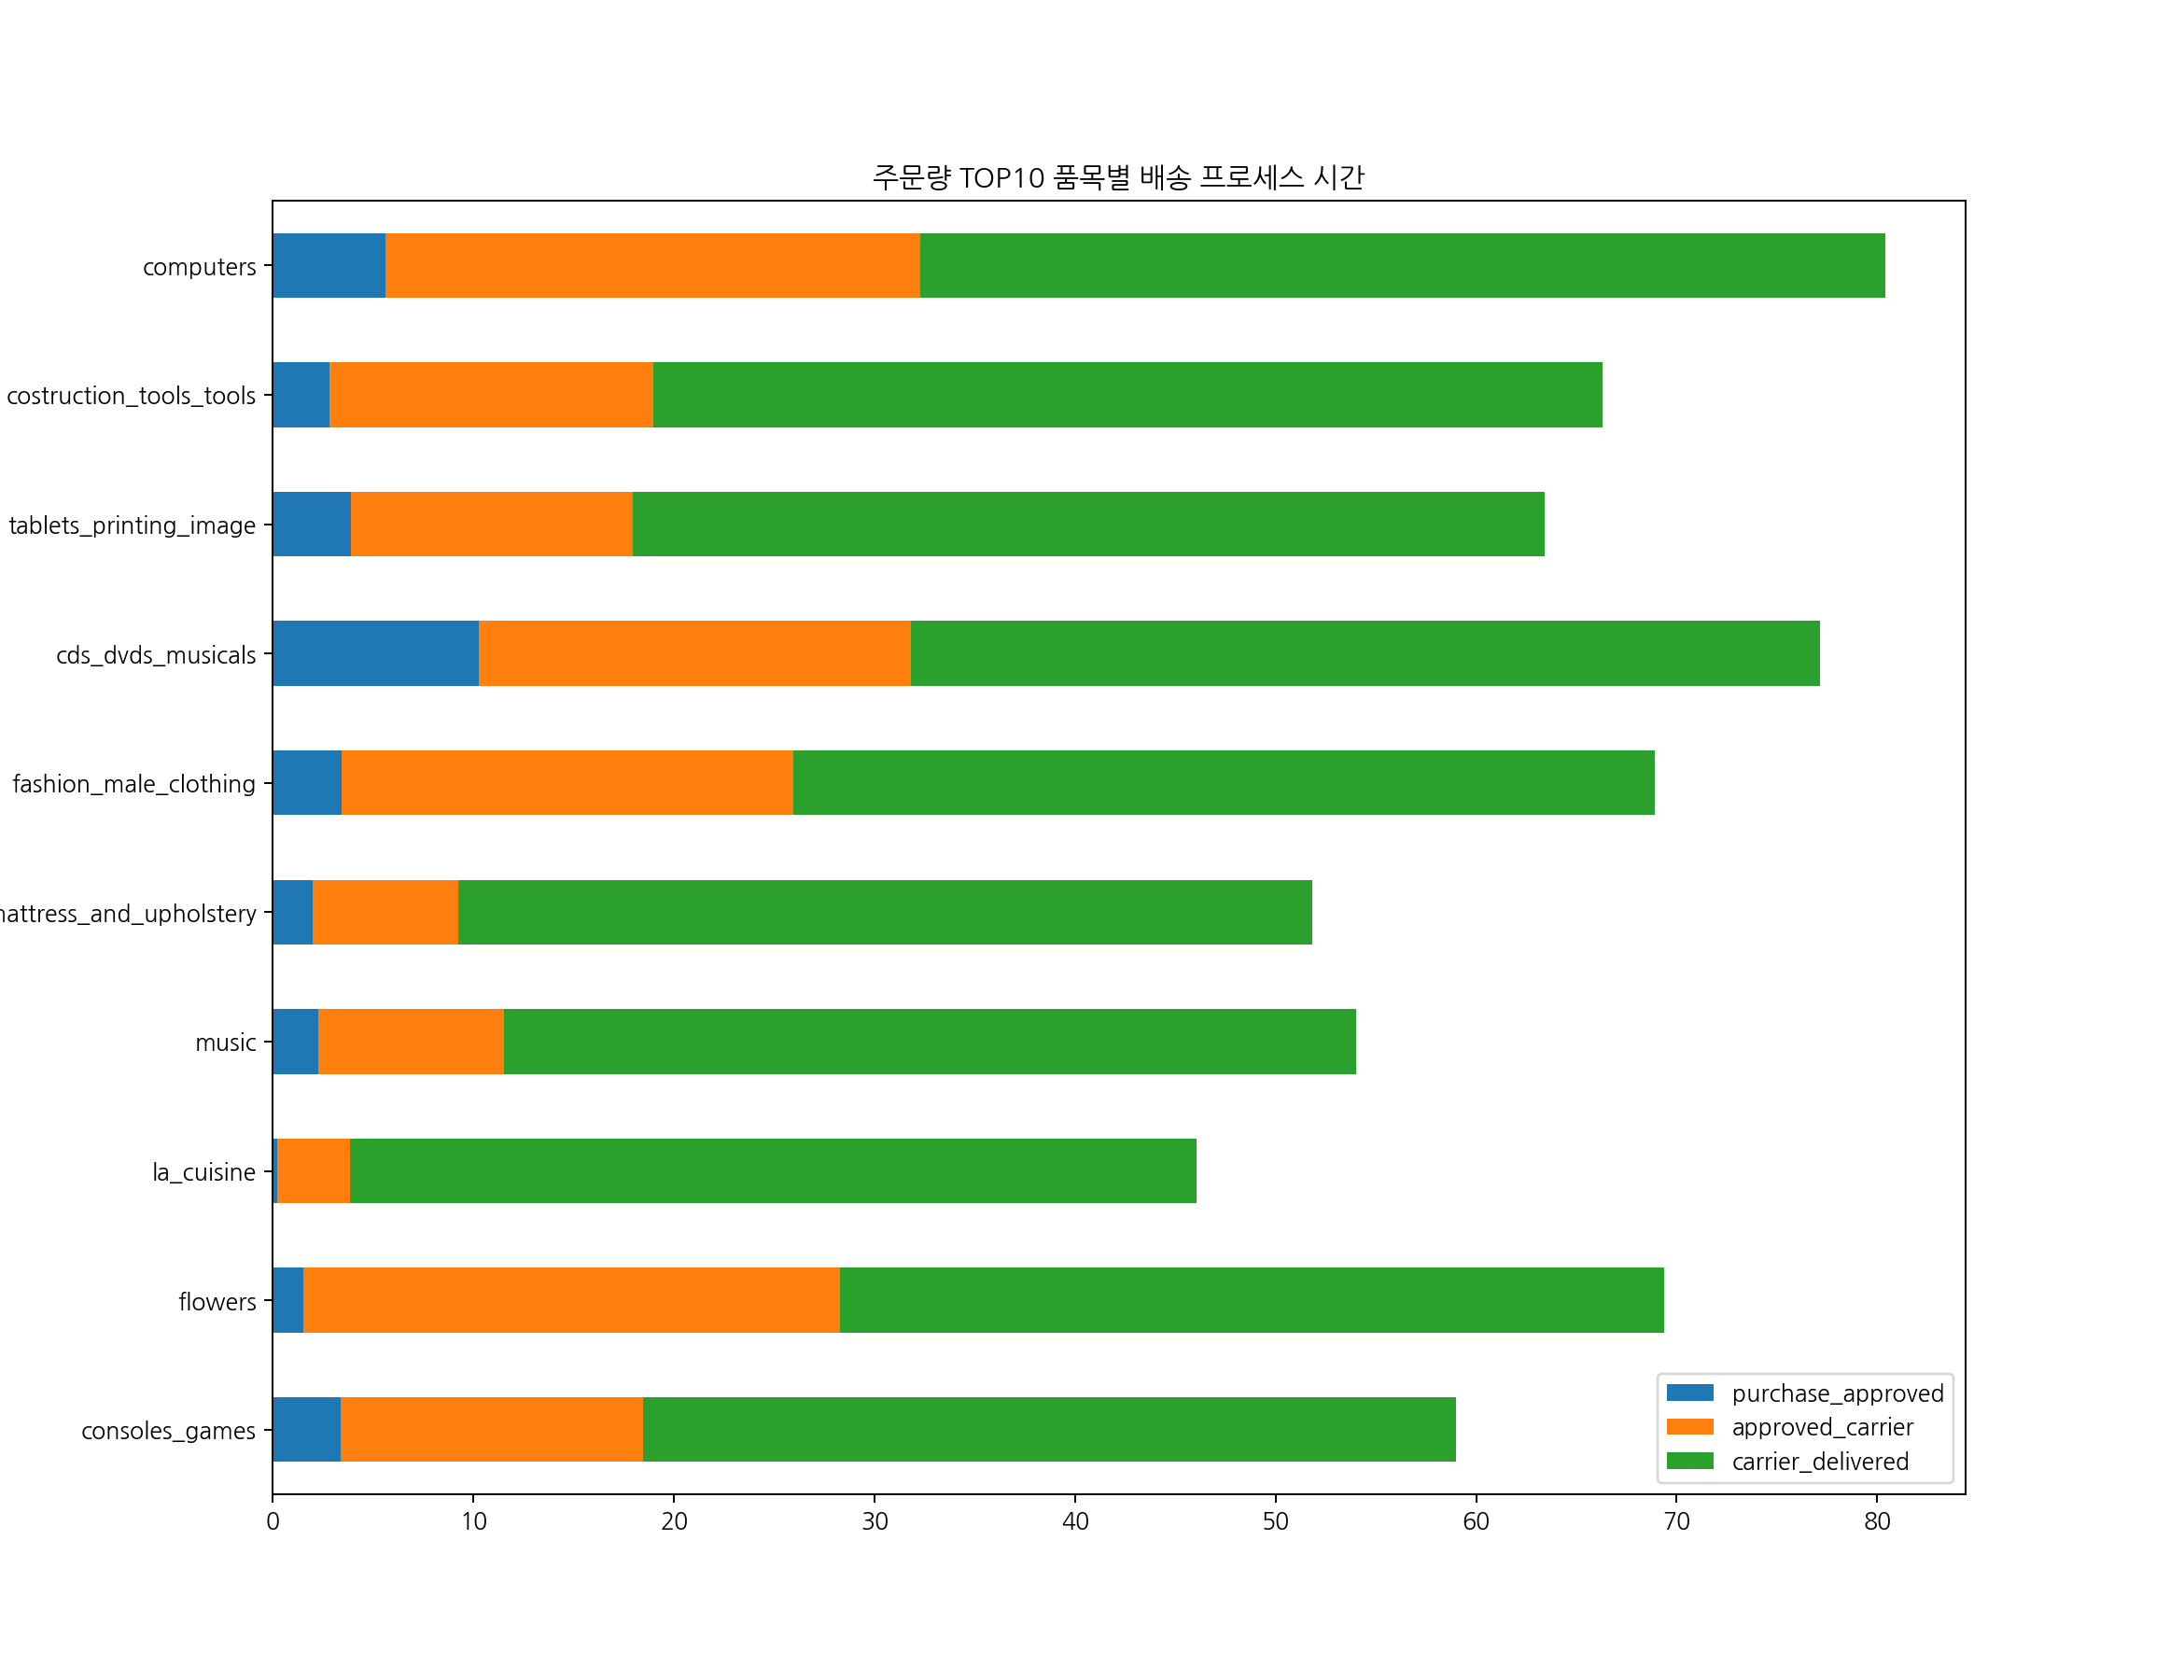

In [258]:
category_timedelta.tail(10).plot.barh(stacked=True, figsize=(13,10));
plt.title("주문량 TOP10 품목별 배송 프로세스 시간");

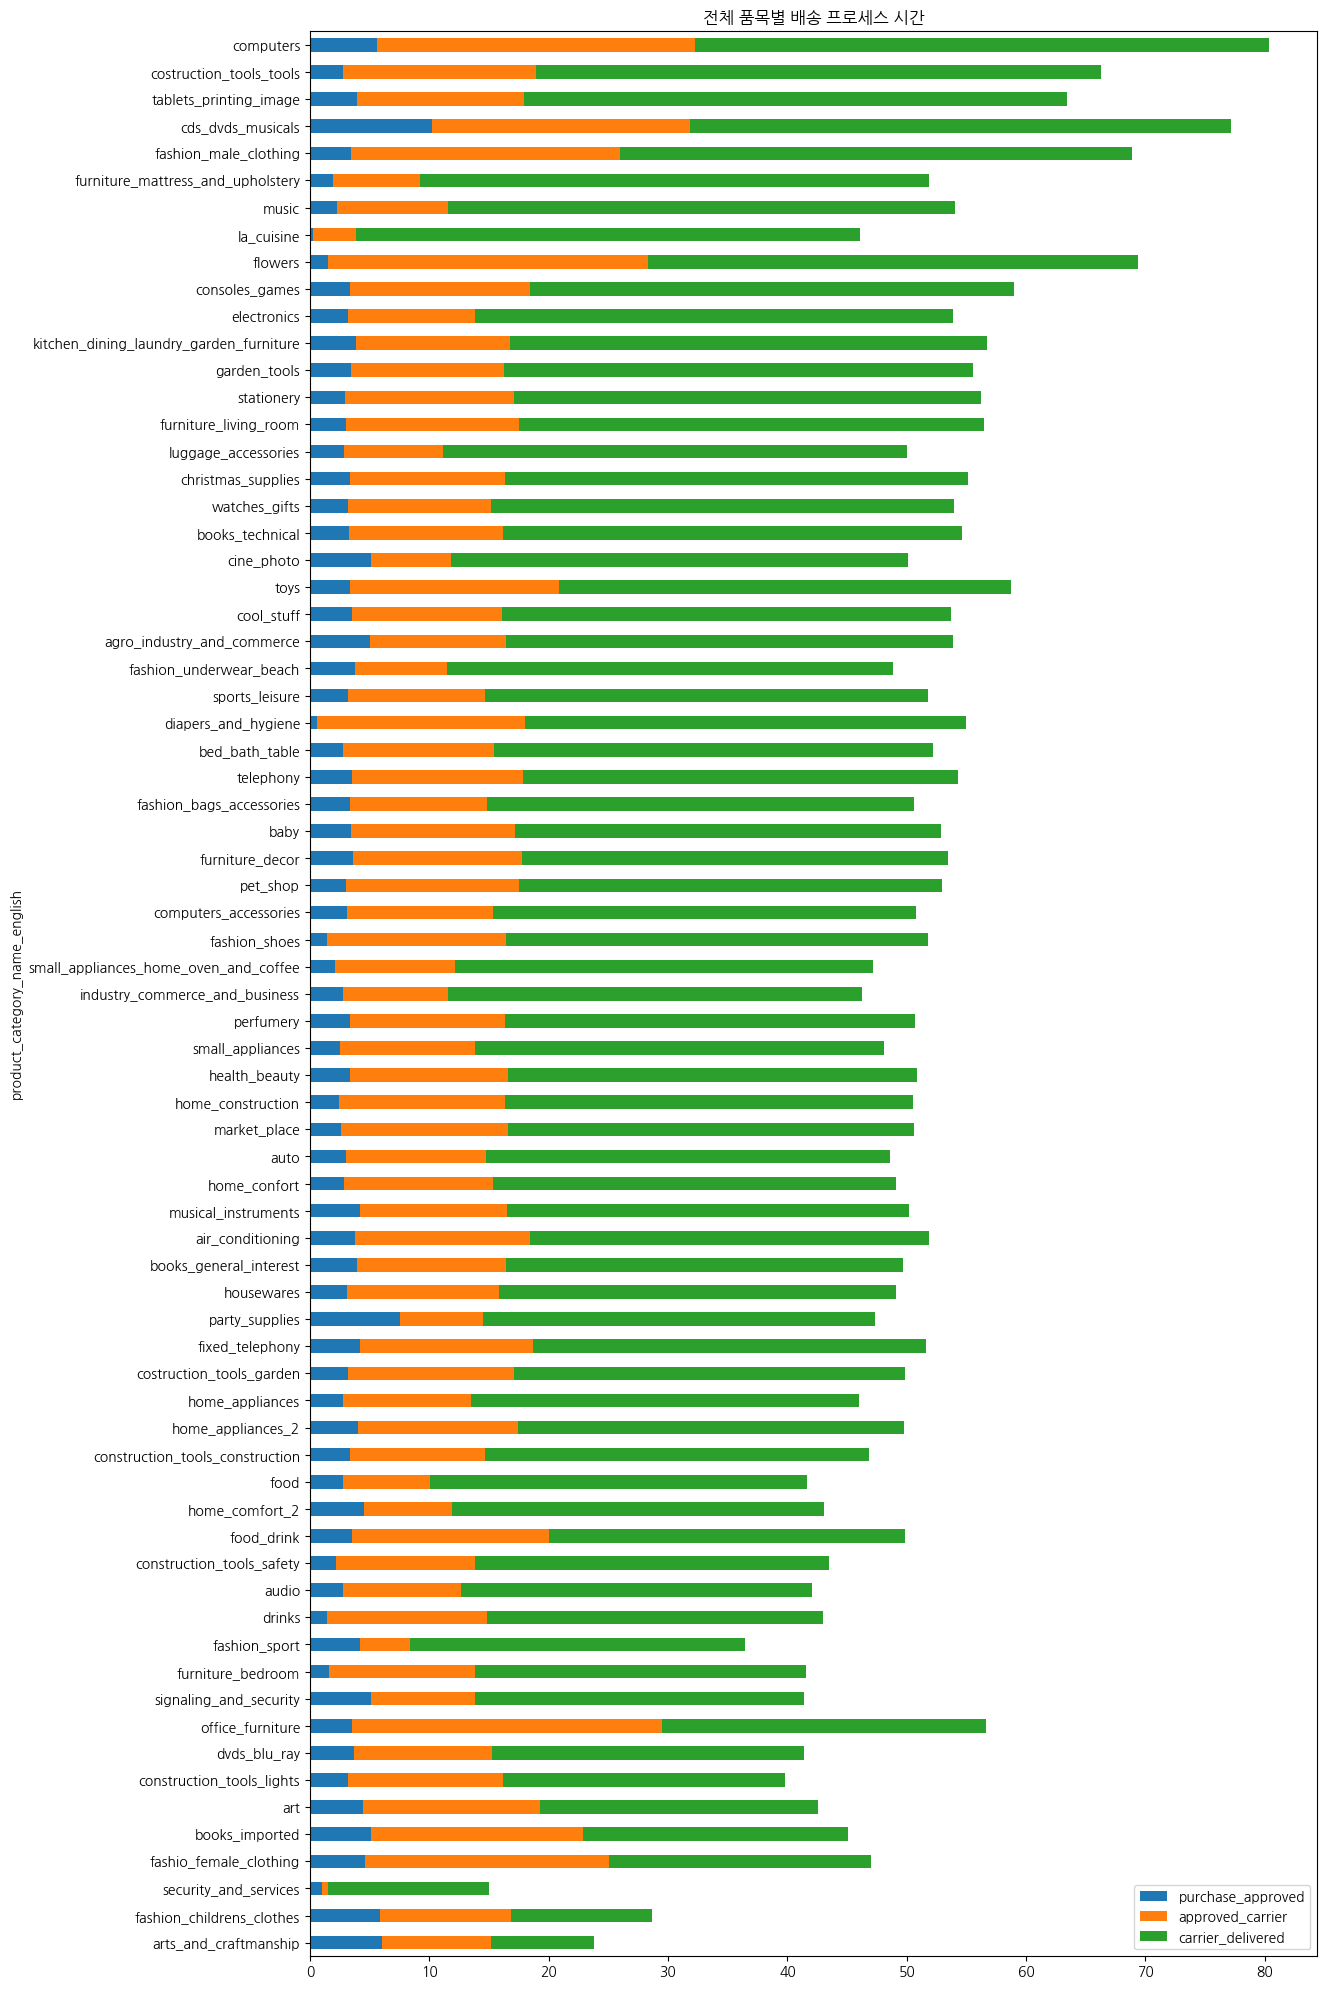

In [158]:
category_timedelta.plot.barh(stacked=True, figsize=(13,25));
plt.title("전체 품목별 배송 프로세스 시간");

#### 주문량 가장 많은 도시 TOP10 배송 프로세스별 시간

In [125]:
top_cities = df_all.groupby('customer_city').count().sort_values(by='order_id', ascending = False)[:10].index
top_cities = top_cities.tolist()
top_cities

['sao paulo',
 'rio de janeiro',
 'belo horizonte',
 'brasilia',
 'curitiba',
 'campinas',
 'porto alegre',
 'salvador',
 'guarulhos',
 'sao bernardo do campo']

In [243]:
city_timedelta = df_all[df_all['customer_city'].isin(top_cities)].groupby('customer_city')[["purchase_approved", "approved_carrier", "carrier_delivered"]].agg(['median'])
# city_timedelta = city_timedelta.sort_values(by="carrier_delivered")
city_timedelta

purchase_approved approved_carrier carrier_delivered
                                 median           median            median
customer_city                                                             
belo horizonte                      0.0              2.0               8.0
brasilia                            0.0              2.0              10.0
campinas                            0.0              2.0               7.0
curitiba                            0.0              2.0               7.0
guarulhos                           0.0              2.0               6.0
porto alegre                        0.0              2.0              13.0
rio de janeiro                      0.0              2.0              11.0
salvador                            0.0              2.0              18.0
sao bernardo do campo               0.0              2.0               5.0
sao paulo                           0.0              2.0               5.0

<IPython.core.display.Javascript object>


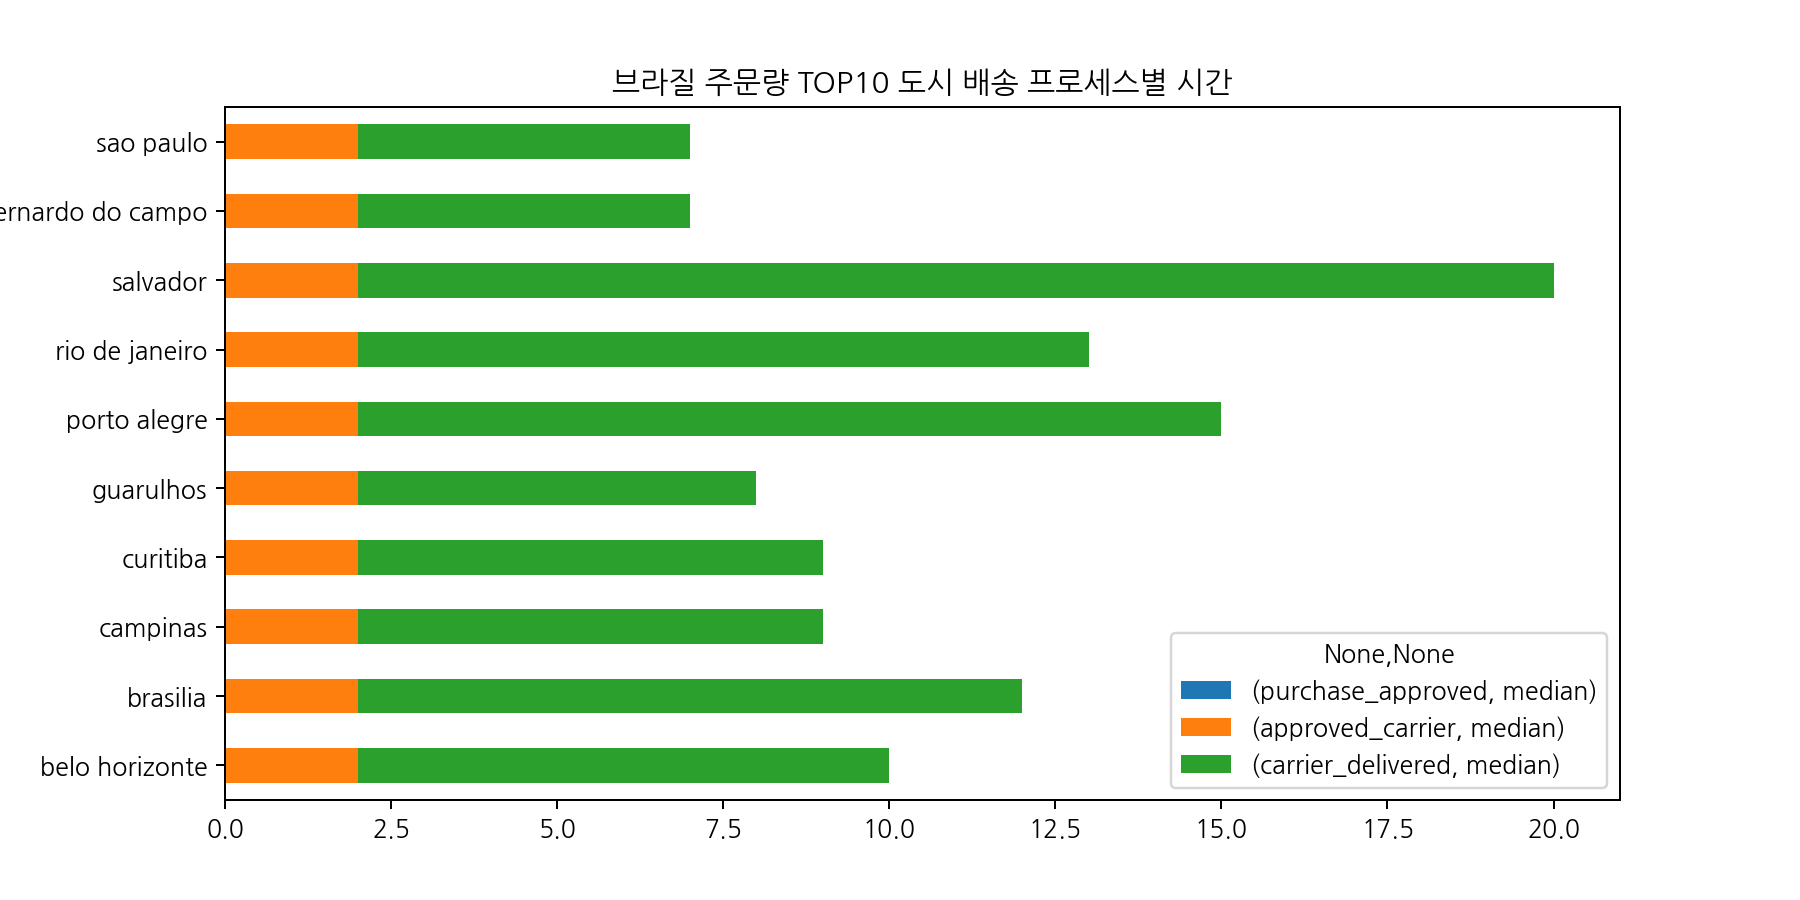

In [244]:
city_timedelta.plot.barh(stacked=True, figsize=(10,5));
plt.title("브라질 주문량 TOP10 도시 배송 프로세스별 시간");

In [161]:
df_all

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2      0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3      bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
...                                 ...                               ...   
94073  87b4c933f31145a28413b39d880ad6c3  ddfdf5e9b2659e1fbd073404c9b762e0   
94074  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
94075  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
94076  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
94077  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp order_approved_at  \
0        delivered               2017-02-10        2017-02-10   
1        delivered               2017-08-15        2017-08-15   
2        delivered               2017-02-08        2017-02-08   
3        delivered               2017-10-23        2017-10-25   
4        delivered               2018-07-24        2018-07-26   
...            ...                      ...               ...   
94073    delivered               2018-02-03        2018-02-03   
94074    delivered               2017-08-10        2017-08-10   
94075    delivered               2017-12-20        2017-12-20   
94076    delivered               2017-03-09        2017-03-09   
94077    delivered               2018-03-08        2018-03-09   

      order_delivered_carrier_date order_delivered_customer_date  \
0                       2017-04-10                    2017-10-10   
1                       2017-08-17                    2017-08-18   
2                       2017-04-08                    2017-07-08   
3                       2017-10-27                    2017-11-07   
4                       2018-07-26                    2018-08-07   
...                            ...                           ...   
94073                   2018-03-06                    2018-03-16   
94074                   2017-08-18                    2017-08-23   
94075                   2017-12-20                    2018-01-26   
94076                   2017-03-10                    2017-03-17   
94077                   2018-03-09                    2018-03-16   

      order_estimated_delivery_date                customer_unique_id  \
0                        2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                        2017-08-28  3a51803cc0d012c3b5dc8b7528cb05f7   
2                        2017-08-15  ef0996a1a279c26e7ecbd737be23d235   
3                        2017-11-13  e781fdcc107d13d865fc7698711cc572   
4                        2018-08-13  af07308b275d755c9edb36a90c618231   
...                             ...                               ...   
94073                    2018-03-21  490c3c53ca927221bccbb00706afbcf9   
94074                    2017-08-31  fb9310710003399b031add3e55f34719   
94075                    2018-01-18  a49e8e11e850592fe685ae3c64b40eca   
94076                    2017-03-28  6359f309b166b0196dbf7ad2ac62bb5a   
94077                    2018-03-04  60350aa974b26ff12caad89e55993bd6   

       zip_code_prefix_customer        customer_city customer_state  \
0                          3149            sao paulo             SP   
1                          3366            sao paulo             SP   
2                          2290            sao paulo             SP   
3                         88032        florianopolis             SC   
4                         47813            barreiras             BA   
...                         ...                  ...            ...   
94073                      2042            sao paulo             SP   
94074                      3318            sao paulo           

In [249]:
# make sur your install folium first
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [250]:
center_location = [-22.9020, -43.1882]
m = folium.Map(location=center_location, control_scale=True, zoom_start=5)

In [251]:
data_delivery = df_all.head(10000)[['geolocation_lat_seller', 'geolocation_lng_seller', 'purchase_approved', 'approved_carrier', \
                                   'carrier_delivered']].groupby(['geolocation_lat_seller', 'geolocation_lng_seller']).median()[['carrier_delivered']]
# data_delivery['carrier_delivered'] /= city_timedelta['carrier_delivered'].max()
data_delivery = data_delivery.reset_index().values.tolist()
data_delivery[:5]

[[-30.068826539621423, -51.18308980672247, 8.5],
 [-30.029973352961232, -51.232284866115926, 3.0],
 [-30.004934574788, -51.19581329724743, 7.0],
 [-29.683118727522963, -51.0869217998165, 5.5],
 [-29.454835817125225, -51.956119295922, 7.5]]

In [252]:
for days in data_delivery:
    if days[2] > 100 :
        delivery_days = 100
    else:
        delivery_days = days[2]
    folium.features.CircleMarker(location = days[:2],
                                 radius = delivery_days/4,
                                 color = '#343477',
                                 fill = True,
                                 fill_color = '#343477',
                                ).add_to(m)
#     folium.Circle(days[:2], radius = days[2], fill='red').add_to(m)
m

In [203]:
%matplotlib notebook
# filtered_orders.loc[:, "count"] =1
heatmap_data_delivery = df_all.head(10000)[['geolocation_lat_seller', 'geolocation_lng_seller', 'purchase_approved', 'approved_carrier', \
                                   'carrier_delivered']].groupby(['geolocation_lat_seller', 'geolocation_lng_seller']).mean()[['carrier_delivered']]
heatmap_data_delivery['carrier_delivered'] /= city_timedelta['carrier_delivered'].max()
heatmap_data_delivery = heatmap_data_delivery.reset_index().values.tolist()
gradient = {0.1: 'blue', 0.2: 'lime', 0.4: 'orange', 0.5: 'red', 0.6: 'purple', 0.9: 'black'}
HeatMap(data=heatmap_data_delivery, radius=7, gradient=gradient, max_zoom=13).add_to(m)
m